In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
x_train = pd.read_csv('x_train_oct.csv')

In [3]:
x_train.shape

(97477, 784)

In [4]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,173,161,141,118,96,76,60,51,28,28,...,192,208,222,236,247,255,250,253,255,255
1,30,31,28,21,18,20,21,18,22,20,...,8,8,9,10,9,8,7,7,7,7
2,34,34,33,33,33,32,32,32,32,31,...,13,12,13,14,14,14,13,13,13,13
3,48,46,44,45,47,46,43,40,36,40,...,82,73,64,56,49,45,24,19,13,9
4,29,29,27,23,20,21,25,29,27,26,...,5,5,5,5,5,5,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97472,14,25,39,55,73,98,126,146,169,185,...,13,13,13,13,13,13,12,12,12,12
97473,15,16,20,23,27,29,31,32,24,21,...,7,7,7,7,7,7,7,7,7,7
97474,25,27,29,30,30,29,28,27,33,32,...,255,255,255,255,255,255,253,254,255,255
97475,111,109,106,104,103,100,96,93,80,82,...,9,9,9,9,9,9,9,8,7,6


In [5]:
y_train = pd.read_csv('y_train_oct.csv')

In [6]:
y_train.shape

(97477, 1)

In [7]:
y_train

,0
0,3
1,1
2,0
3,3
4,3
...,...
97472,0
97473,3
97474,0
97475,1


In [8]:
from sklearn.utils import resample

In [9]:
df = pd.concat([x_train, y_train], axis=1)

class_counts=df.iloc[:,-1].value_counts()
min_class = class_counts.idxmin()
min_count = class_counts.min()

balanced_data = pd.DataFrame()
for class_index in class_counts.index:
    class_subset = df[df.iloc[:,-1] == class_index]
    resampled_subset = resample(class_subset,
                                replace=False,
                                n_samples=min_count,
                                random_state=123)  # Ensure reproducibility
    balanced_data = pd.concat([balanced_data, resampled_subset], axis=0)
    


In [10]:
balanced_data.shape

(31016, 785)

In [11]:
balanced_data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
3567,20,20,18,17,15,15,15,15,18,18,...,6,6,6,6,6,6,6,6,6,3
11730,40,42,45,48,48,46,44,42,42,39,...,254,255,255,255,255,253,254,255,255,3
48892,25,28,30,29,25,22,21,22,26,25,...,7,7,6,6,6,6,6,6,6,3
71984,33,32,30,29,29,29,30,31,39,33,...,255,255,255,255,255,255,255,255,255,3
41649,31,30,29,28,27,28,29,30,28,29,...,11,11,11,10,10,12,12,12,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51043,252,252,253,253,254,255,255,255,255,255,...,12,12,12,12,12,12,12,12,12,2
16830,20,18,17,17,16,14,13,15,22,19,...,6,6,6,6,6,8,8,8,8,2
43419,105,109,117,127,137,147,154,158,169,171,...,11,11,11,11,11,11,11,11,11,2
94837,28,26,24,22,21,21,22,23,20,22,...,8,8,8,8,8,9,9,9,9,2


In [12]:
y_balanced = balanced_data.iloc[:,-1:]

In [13]:
y_balanced.shape

(31016, 1)

In [14]:
x_balanced = balanced_data.drop(balanced_data.columns[-1], axis=1)

In [15]:
x_balanced.shape

(31016, 783)

In [16]:
#grid search time!
#paramGridrF = {'n_estimators': [ 100, 150, 200, 250],
#                'max_depth': [2, 4, 6, 8, 10],
#                'max_features': [20, 'sqrt', 35],
#                'max_leaf_nodes': [2,4,6,8]
#                }


short_testGrid = {'n_estimators': [200, 250],
                'max_depth': [8, 10],
                'max_features': ['sqrt', 35],
                }

#default values for each hyperparameter
#n_estimators = 100
#max_depth = None
#max_features = 'sqrt'
#min_samples_leafs = 1
#

In [17]:
#instead of using the gini coefficient (the default criterion, we used log_loss, a metric we discussed in class).

rf3 = RandomForestClassifier(  criterion = 'log_loss', oob_score=True  )


In [18]:
rf3.fit(x_balanced, y_balanced)

C:\Users\PEREZRT\AppData\Local\Temp\ipykernel_20460\1823315968.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(x_balanced, y_balanced)


RandomForestClassifier(criterion='log_loss', oob_score=True)

In [21]:
oob_score = rf3.oob_score_
print(f"OOB Score: {oob_score:.4f}")

OOB Score: 0.6847


In [22]:
#lets get our scorer
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
def oob_scorer(estimator, x, y):
    return estimator.oob_score_

out_ofbag_scorer = make_scorer(oob_scorer, greater_is_better=True)

In [23]:
y_balanced_array = y_balanced.values

In [24]:
y_balanced_array

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [27]:
#executing the grid search
#in the report, explain what this is 
from sklearn.model_selection import GridSearchCV

#oob_score_Grid = rf3.oob_score_

#'neg mean squared eror tries to minimize the OOB score'
gridrF_oob = grid_search = GridSearchCV(rf3, short_testGrid, scoring='neg_mean_squared_error', cv=4,
                           n_jobs=-1, verbose=4)

gridrF_oob.fit( x_balanced, y_balanced_array )



Fitting 4 folds for each of 8 candidates, totalling 32 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='log_loss',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': ['sqrt', 35],
                         'n_estimators': [200, 250]},
             scoring='neg_mean_squared_error', verbose=4)

In [33]:

class_weight_Grid =  {'class_weight': [{0:10, 1:10, 2:4, 3:1},
    {0:9, 1:9, 2:3.5, 3:1},
    {0:8, 1:8, 2:3, 3:1},
    {0:7, 1:7, 2:2.5, 3:1},
    {0:6, 1:6, 2:2, 3:1} ] } 


In [28]:
gridrF_oob.cv_results_


{'mean_fit_time': array([ 57.6213634 ,  76.42862099,  76.040039  ,  93.78253859,
         81.98304218,  99.65224534,  86.63899308, 102.20454311]),
 'std_fit_time': array([0.32531519, 0.72374483, 1.04135348, 1.86860173, 0.84324926,
        0.59999919, 0.36231702, 0.56286771]),
 'mean_score_time': array([0.36319357, 0.5557096 , 0.47403616, 0.59374934, 0.45485514,
        0.58486086, 0.36460853, 0.38066661]),
 'std_score_time': array([0.01702338, 0.06663229, 0.07284043, 0.05285504, 0.02979838,
        0.04431366, 0.076621  , 0.03365767]),
 'param_max_depth': masked_array(data=[8, 8, 8, 8, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 35, 35, 'sqrt', 'sqrt', 35, 35],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=

In [30]:
gridrF_oob.best_params_


{'max_depth': 10, 'max_features': 35, 'n_estimators': 250}

In [31]:
gridrF_oob.best_score_

-1.0544880061903534

In [40]:
gridRf_ClassWeights = GridSearchCV(rf3, class_weight_Grid, scoring = 'neg_mean_squared_error', cv=4,
                           n_jobs=-1, verbose=4)

gridRf_ClassWeights.fit( x_balanced, y_balanced_array )

Fitting 4 folds for each of 5 candidates, totalling 20 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='log_loss',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 10, 1: 10, 2: 4, 3: 1},
                                          {0: 9, 1: 9, 2: 3.5, 3: 1},
                                          {0: 8, 1: 8, 2: 3, 3: 1},
                                          {0: 7, 1: 7, 2: 2.5, 3: 1},
                                          {0: 6, 1: 6, 2: 2, 3: 1}]},
             scoring='neg_mean_squared_error', verbose=4)

In [41]:
gridRf_ClassWeights.best_score_

-0.8784175909208151

In [43]:
gridRf_ClassWeights.cv_results_


{'mean_fit_time': array([83.9052906 , 84.28020096, 84.50280213, 67.05823201, 66.74190164]),
 'std_fit_time': array([1.71523015, 1.26972529, 1.75401739, 0.69994638, 0.44793281]),
 'mean_score_time': array([0.66781092, 0.65219045, 0.59360647, 0.54283917, 0.31242871]),
 'std_score_time': array([0.15791173, 0.14502263, 0.16495006, 0.05453751, 0.03314339]),
 'param_class_weight': masked_array(data=[{0: 10, 1: 10, 2: 4, 3: 1}, {0: 9, 1: 9, 2: 3.5, 3: 1},
                    {0: 8, 1: 8, 2: 3, 3: 1}, {0: 7, 1: 7, 2: 2.5, 3: 1},
                    {0: 6, 1: 6, 2: 2, 3: 1}],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': {0: 10, 1: 10, 2: 4, 3: 1}},
  {'class_weight': {0: 9, 1: 9, 2: 3.5, 3: 1}},
  {'class_weight': {0: 8, 1: 8, 2: 3, 3: 1}},
  {'class_weight': {0: 7, 1: 7, 2: 2.5, 3: 1}},
  {'class_weight': {0: 6, 1: 6, 2: 2, 3: 1}}],
 'split0_test_score': array([-0.86948672, -0.88599433, -0.89863296, -0.

In [42]:
gridRf_ClassWeights.best_params_

{'class_weight': {0: 7, 1: 7, 2: 2.5, 3: 1}}

In [46]:
class_weight_Grid_more =  {'class_weight': [{0:10, 1:10, 2:4, 3:1},
    {0:9, 1:9, 2:3.5, 3:1},
    {0:8, 1:8, 2:3, 3:1},
    {0:7, 1:7, 2:2.5, 3:1},
    {0:7, 1:7, 2:3, 3:1},
    {0:7, 1:7, 2:2, 3:1},
    {0:6, 1:6, 2:2, 3:1} ] } 


gridRf_f1macro = GridSearchCV(rf3, class_weight_Grid_more, scoring = 'f1_macro', cv=4,
                           n_jobs=-1, verbose=4)

gridRf_f1macro.fit( x_train, y_train )


Fitting 4 folds for each of 7 candidates, totalling 28 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(criterion='log_loss',
                                              oob_score=True),
             n_jobs=-1,
             param_grid={'class_weight': [{0: 10, 1: 10, 2: 4, 3: 1},
                                          {0: 9, 1: 9, 2: 3.5, 3: 1},
                                          {0: 8, 1: 8, 2: 3, 3: 1},
                                          {0: 7, 1: 7, 2: 2.5, 3: 1},
                                          {0: 7, 1: 7, 2: 3, 3: 1},
                                          {0: 7, 1: 7, 2: 2, 3: 1},
                                          {0: 6, 1: 6, 2: 2, 3: 1}]},
             scoring='f1_macro', verbose=4)

In [47]:
gridRf_f1macro.cv_results_

{'mean_fit_time': array([268.99736279, 270.07523185, 270.55558676, 259.5373655 ,
        261.7204392 , 263.83547473, 162.79382354]),
 'std_fit_time': array([1.66805718, 2.05339449, 2.05810039, 1.92986175, 1.69569693,
        1.50423648, 1.43173167]),
 'mean_score_time': array([3.16721731, 2.91879457, 2.8524034 , 3.42887455, 2.67124158,
        1.68709737, 1.12471873]),
 'std_score_time': array([0.21880488, 0.37554814, 0.29154446, 0.27180579, 0.39627024,
        0.19974532, 0.09308087]),
 'param_class_weight': masked_array(data=[{0: 10, 1: 10, 2: 4, 3: 1}, {0: 9, 1: 9, 2: 3.5, 3: 1},
                    {0: 8, 1: 8, 2: 3, 3: 1}, {0: 7, 1: 7, 2: 2.5, 3: 1},
                    {0: 7, 1: 7, 2: 3, 3: 1}, {0: 7, 1: 7, 2: 2, 3: 1},
                    {0: 6, 1: 6, 2: 2, 3: 1}],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'class_weight': {0: 10, 1: 10, 2: 4, 3: 1}},
  {'class_weight': {0: 9, 1: 9, 2: 3.

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib as plt
import matplotlib.pyplot as plt_py

y = y_train
x = x_train

In [12]:
#here, we initialized a random forest classifier and performed a 4-fold cross validation over all of the data
#we did this to get a baseline estimate of our model's performance
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

scores_4fold = cross_val_score(rf1, x, y, cv = 4)
print(f"Cross-Validation Scores for Model rf1: {scores_4fold}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

Cross-Validation Scores for Model rf1: [0.79331145 0.79855554 0.79285157 0.79317986]


In [59]:
rf1.fit(x_train,y_train)

C:\Users\PEREZRT\AppData\Local\Temp\ipykernel_15392\1984171870.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(x_train,y_train)


RandomForestClassifier()

In [66]:
rf1_topfeatures = rf1.feature_importances_
rf1_topfeatures.shape

(786,)

In [71]:
rf1_topfeatures.argmax()
#'293' is the attribute most commonly used in deciding

293

In [79]:
rf1_topfeatures.argsort()[-10:]
#the top 6 are 293,266,349,322,294,238


array([350, 237, 265, 321, 238, 294, 322, 349, 266, 293], dtype=int64)

In [74]:
list_topfeatures = [350, 237, 265, 321, 238, 294, 322, 349, 266, 293]

In [77]:
rf1_topfeatures[238]
rf1_topfeatures[293]

0.006142299604056883

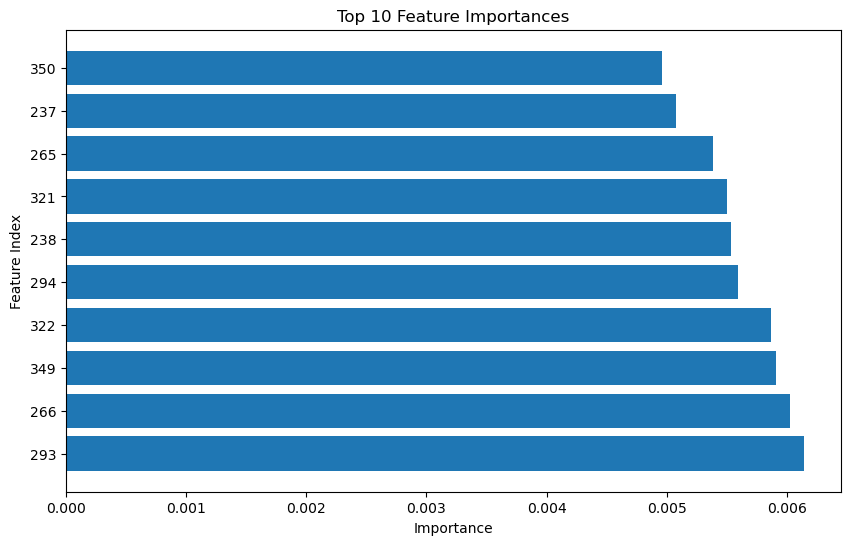

In [86]:
import matplotlib.pyplot as pltpy

list_topfeatures = rf1_topfeatures.argsort()[-10:]
list_topvalues = rf1_topfeatures[list_topfeatures]

pltpy.figure(figsize=(10, 6))
pltpy.barh(range(len(list_topvalues)), list_topvalues, align='center')
pltpy.yticks(range(len(list_topfeatures)), list_topfeatures)
pltpy.xlabel('Importance')
pltpy.ylabel('Feature Index')
pltpy.title('Top 10 Feature Importances')
pltpy.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
pltpy.show()

In [93]:
np.sum(list_topvalues)

0.056002512921964225

In [13]:
y.value_counts()

0
3    46026
0    33484
1    10213
2     7754
dtype: int64

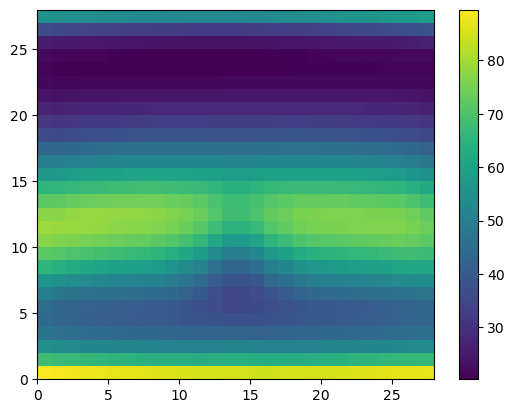

In [11]:
#let's visualize the mean array for all of the data
arrayAvg = x_train.mean().values
matrixAvg = np.reshape( arrayAvg, (28,28) )
heat_avg = plt_py.pcolormesh( matrixAvg )
plt_py.colorbar(heat_avg)

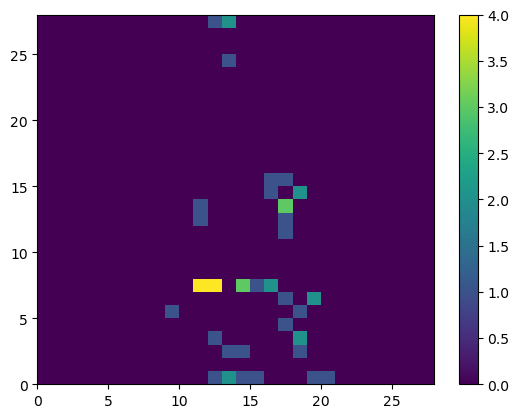

In [12]:
#let's visualize the mean array for all of the data
arrayMin = x_train.min().values
matrixMin = np.reshape( arrayMin, (28,28) )
heat_Min = plt_py.pcolormesh( matrixMin )
plt_py.colorbar(heat_Min)

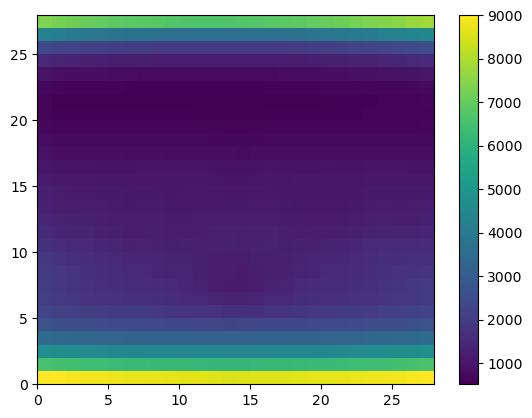

In [13]:
#let's visualize the variance array for all of the data
arrayVar = x.var().values
matrixVar = np.reshape( arrayVar, (28,28) )
heat_Var = plt_py.pcolormesh( matrixVar )
plt_py.colorbar(heat_Var)

In [17]:
inner_half_var = arrayVar[168:560]

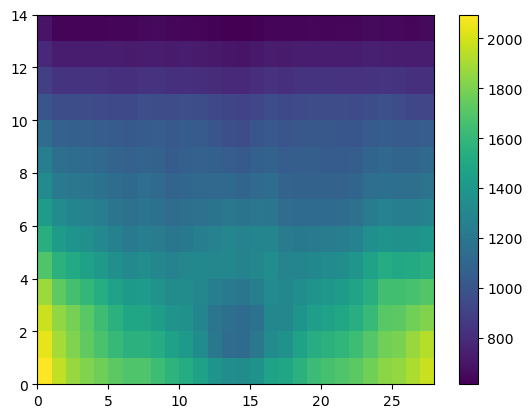

In [18]:
matrix_inner_Var = np.reshape( inner_half_var, (14,28) )
heat_inner_Var = plt_py.pcolormesh( matrix_inner_Var )
plt_py.colorbar(heat_inner_Var)

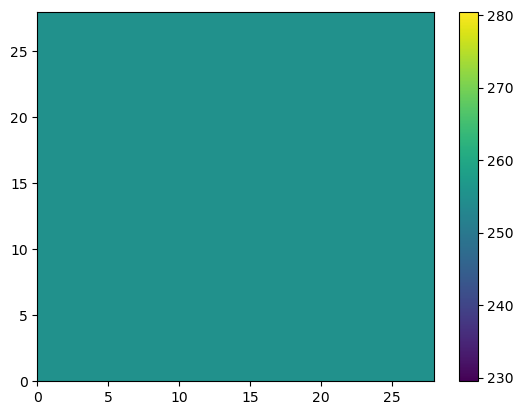

In [30]:
#let's visualize the max array for all of the data
arrayMax = x.max().values
matrixMax = np.reshape( arrayMax, (28,28) )
heat_Max = plt_py.pcolormesh( matrixMax )
plt_py.colorbar(heat_Max)

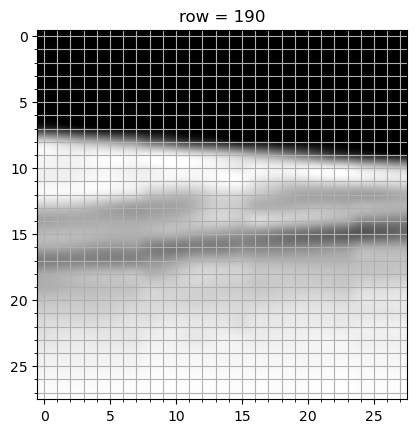

In [47]:
import matplotlib
import matplotlib.pyplot
def displayPixels( data, nRow ):
    bitArray = data.iloc[ nRow, :-1].values
    bitMatrix = np.reshape( bitArray.astype(int), (28,28) )
    matplotlib.pyplot.clf()
    matplotlib.pyplot.imshow( bitMatrix, cmap='gray_r', interpolation='spline36' )
    matplotlib.pyplot.title( "row = " + str(nRow)  )
    matplotlib.pyplot.minorticks_on()
    matplotlib.pyplot.grid( which = "both")
    matplotlib.pyplot.show()
displayPixels( x, 190 )

In [40]:
kmeans3 = KMeans( n_clusters=3 ) 
kmeans3.fit( x, y )

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [41]:
x['kmeans3'] = kmeans3.labels_

In [42]:
centroids3 = kmeans3.cluster_centers_
centroids3.shape

(3, 784)

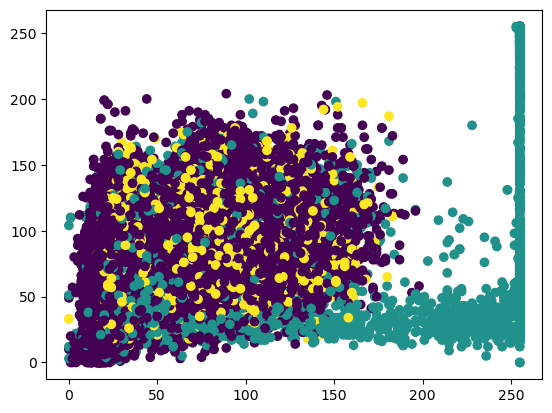

In [50]:
kmeans3_plot_170_224 = matplotlib.pyplot.scatter( x['200'], x['260'], c=x.kmeans3)

In [51]:
x['kmeans3'].value_counts()

0    69522
1    15076
2    12879
Name: kmeans3, dtype: int64

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


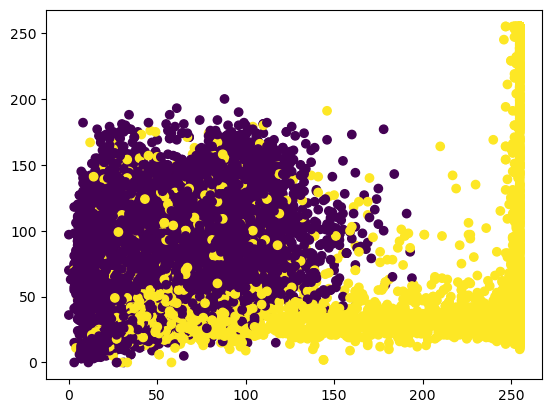

In [53]:
kmeans2 = KMeans( n_clusters=2 ) 
kmeans2.fit( x, y )
x['kmeans2'] = kmeans2.labels_

kmeans2_plot_150_230 = matplotlib.pyplot.scatter( x['150'], x['230'], c=x.kmeans2)

In [55]:
x.shape
#y.shape

(97477, 786)

In [52]:
y.value_counts()

0
3    46026
0    33484
1    10213
2     7754
dtype: int64

In [ ]:
#pixels in rows 0-5 and 23-28 did not contribute much to how our classes are distinguished (images are cropped so that they can be centered)
#141-672 ARE THE PIXELS WE WANT TO USE


In [15]:
print(y.columns)

Index(['0'], dtype='object')


In [96]:
x

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,kmeans2
0,173,161,141,118,96,76,60,51,28,28,...,208,222,236,247,255,250,253,255,255,0
1,30,31,28,21,18,20,21,18,22,20,...,8,9,10,9,8,7,7,7,7,0
2,34,34,33,33,33,32,32,32,32,31,...,12,13,14,14,14,13,13,13,13,0
3,48,46,44,45,47,46,43,40,36,40,...,73,64,56,49,45,24,19,13,9,0
4,29,29,27,23,20,21,25,29,27,26,...,5,5,5,5,5,4,4,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97472,14,25,39,55,73,98,126,146,169,185,...,13,13,13,13,13,12,12,12,12,0
97473,15,16,20,23,27,29,31,32,24,21,...,7,7,7,7,7,7,7,7,7,0
97474,25,27,29,30,30,29,28,27,33,32,...,255,255,255,255,255,253,254,255,255,0
97475,111,109,106,104,103,100,96,93,80,82,...,9,9,9,9,9,9,8,7,6,0


In [95]:
x.drop(columns=['kmeans3'], inplace=True)


In [102]:
rf2 = RandomForestClassifier(max_features = 15)

predict_rf2 = cross_val_predict(rf2, x, y, cv = 4)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector 

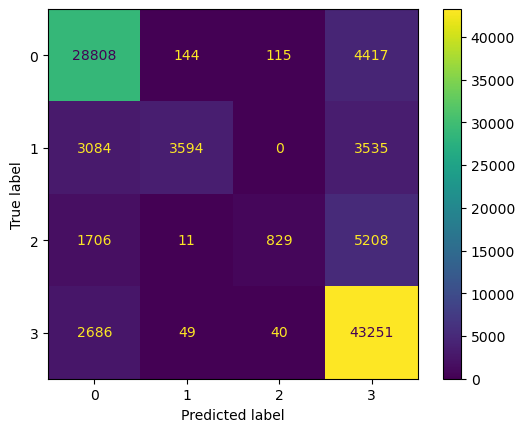

In [105]:
import sklearn.metrics
cmrf2 = sklearn.metrics.confusion_matrix( y, predict_rf2 )
plotCmDtTest = sklearn.metrics.ConfusionMatrixDisplay( cmrf2).plot()

In [107]:
xy_df = pd.concat([x, y], axis=1)

In [109]:
xy_3 = xy_df[xy_df.iloc[:, -1] == 3]
xy_2 = xy_df[xy_df.iloc[:, -1] == 2]
xy_1 = xy_df[xy_df.iloc[:, -1] == 1]
xy_0 = xy_df[xy_df.iloc[:, -1] == 0]

In [115]:
sample_xy_3 = xy_3.sample(n=7754)
sample_xy_2 = xy_2.sample(n=7754)
sample_xy_1 = xy_1.sample(n=7754)
sample_xy_0 = xy_0.sample(n=7754)

In [116]:
y_3 = sample_xy_3.iloc[:, -1]  # Extract the final column as y_3
x_3 = sample_xy_3.iloc[:, :-1]  # Extract all columns except the last one as x_3

y_2 = sample_xy_2.iloc[:, -1]  # Extract the final column as y_2
x_2 = sample_xy_2.iloc[:, :-1]  # Extract all columns except the last one as x_2

y_1 = sample_xy_1.iloc[:, -1]  # Extract the final column as y_1
x_1 = sample_xy_1.iloc[:, :-1]  # Extract all columns except the last one as x_1

y_0 = sample_xy_0.iloc[:, -1]  # Extract the final column as y_0
x_0 = sample_xy_0.iloc[:, :-1]  # Extract all columns except the last one as x_0

In [123]:
y_equal = pd.concat([y_3, y_2, y_1, y_0], axis=0)
x_equal = pd.concat([x_3, x_2, x_1, x_0], axis=0)

In [124]:
y_equal.value_counts()

3    7754
2    7754
1    7754
0    7754
Name: 0, dtype: int64

In [128]:
from sklearn.model_selection import train_test_split

x_train_equal, x_test_equal, y_train_equal, y_test_equal = train_test_split(x_equal, y_equal, test_size=0.70, stratify=y_equal)

In [126]:
x_equal.shape

(31016, 785)

In [127]:
y_equal.shape

(31016,)

In [129]:
y_train_equal_inner = y_train_equal
x_train_equal_inner = x_train_equal

In [130]:
lower_range_list = [num for num in range(140)]
upper_range_list = [num for num in range(672, 785)]

In [131]:
features_toeliminate_list = lower_range_list + upper_range_list

In [135]:
x_train_equal_inner = x_train_equal_inner.drop(columns=x_train_equal_inner.columns[features_toeliminate_list])
y_train_equal_inner = x_train_equal_inner.drop(columns=x_train_equal_inner.columns[features_toeliminate_list])

IndexError: index 672 is out of bounds for axis 0 with size 532

In [136]:
x_train_equal_inner.shape

(9304, 532)

In [137]:
y_train_equal_inner.shape

(9304,)

In [138]:
y_train_equal_inner.value_counts()

2    2326
1    2326
3    2326
0    2326
Name: 0, dtype: int64

In [141]:
rf3 = RandomForestClassifier(max_features = 15)

predict_rf3 = cross_val_predict(rf3, x_train_equal_inner, y_train_equal_inner, cv = 4)


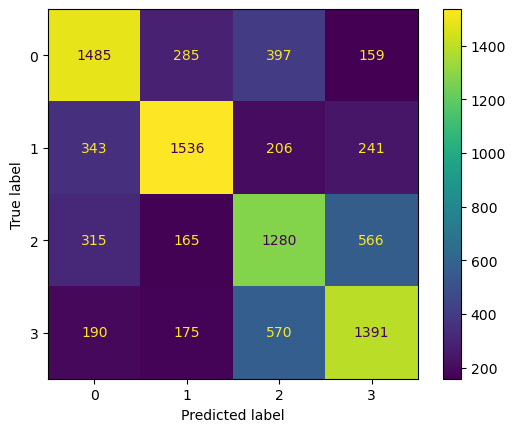

In [142]:
cmrf3 = sklearn.metrics.confusion_matrix( y_train_equal_inner, predict_rf3 )
plotCm3 = sklearn.metrics.ConfusionMatrixDisplay( cmrf3).plot()
#given that there are 2,326 examples to each class
#and 9304 examples in total
#accuracy takes a huge hit
#bet worse at distinguishing class 3 (nothing)